# Recurrent Neural Network (RNN)

## Example: NLP Sentiment Analysis
https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# getting the data
trip = pd.read_csv('tripadvisor_hotel_reviews.csv')
trip.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [15]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


### Change labels

In [16]:
# Let's check the different rating present
trip['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

Text(0, 0.5, 'Rating')

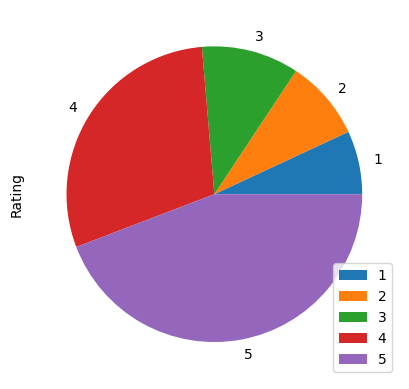

In [17]:
plt.figure()
trip.groupby('Rating').size().plot(kind='pie',y='Rating',legend=True)
plt.ylabel('Rating')

In [18]:
# rating 4, 5 => Positive; 1, 2, 3 => Negative
def ratings(rating):
    if rating>3 and rating<=5:
        return 1
    if rating>0 and rating<=3:
        return 0

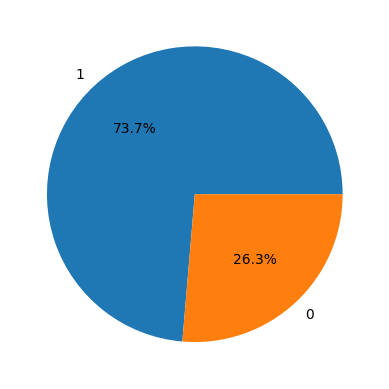

In [19]:
trip['Rating'] = trip['Rating'].apply(ratings)
plt.pie(trip['Rating'].value_counts(), labels=trip['Rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [20]:
trip.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,1
1,ok nothing special charge diamond member hilto...,0
2,nice rooms not 4* experience hotel monaco seat...,0
3,"unique, great stay, wonderful time hotel monac...",1
4,"great stay great stay, went seahawk game aweso...",1


In [21]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Tokenization

In [60]:
# Let's assign the Id to all the unique words present in Tokens columns
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(trip['Review'])

In [23]:
# Let's see total number of unique words present in all the reveiws combined
vocab_size = len(tokenizer.index_word)

# tokeninzer.index_word is a dictonary which can be user to view all the unique words and there ID's.

print(f'There are total {vocab_size} unique words present')

There are total 52211 unique words present


In [24]:
# Now let's replace each word in review with there respective token id
sequences = tokenizer.texts_to_sequences(trip['Review'])
sequences

[[11,
  1,
  184,
  232,
  36,
  6,
  259,
  8,
  1,
  908,
  108,
  246,
  194,
  100,
  741,
  512,
  74,
  9,
  768,
  232,
  58,
  418,
  157,
  34,
  296,
  425,
  3298,
  51,
  2,
  2,
  22,
  11,
  175,
  49,
  55,
  2178,
  5710,
  5196,
  203,
  565,
  3,
  4430,
  24,
  468,
  433,
  2,
  17,
  88,
  621,
  14821,
  571,
  1769,
  2503,
  388,
  32,
  1188,
  1463,
  430,
  10,
  377,
  3103,
  3220,
  311,
  1582,
  11,
  9,
  3,
  7560,
  8,
  11,
  500,
  464,
  1121,
  135,
  883,
  14,
  4,
  103,
  214,
  186,
  110,
  11,
  85,
  183,
  193,
  802,
  232,
  17],
 [148,
  145,
  279,
  340,
  1653,
  897,
  508,
  370,
  991,
  3104,
  2590,
  908,
  536,
  386,
  71,
  178,
  231,
  205,
  399,
  3267,
  3,
  178,
  438,
  46,
  276,
  1,
  2,
  100,
  3105,
  364,
  56,
  1063,
  130,
  141,
  24,
  188,
  1978,
  4039,
  56,
  1248,
  121,
  764,
  1103,
  533,
  3267,
  3675,
  399,
  1279,
  62,
  21,
  36,
  4493,
  2109,
  3317,
  634,
  2,
  46,
  438,
  1427,
 

### Model Building

In [25]:
# Now to create a RNN-NLP model,each input should be equal in length
# we can acheciving by padding
from tensorflow.keras.preprocessing.sequence import pad_sequences

# We will keep the length of inputs to be 100.So if any input have length less then 100,extra 0s will be added
# Any input with length more then 100 will have the extra word removed.
sequences_padded = pad_sequences(sequences,maxlen=100,padding='post')

In [26]:
sequences_padded # input data

array([[  11,    1,  184, ...,    0,    0,    0],
       [ 322, 2355,    1, ...,  991,   63,  536],
       [ 443,    2, 1285, ...,   47, 3676,   87],
       ...,
       [ 148,   10,  756, ...,    0,    0,    0],
       [1767, 1318,  577, ...,  329, 5414, 4324],
       [  32, 1188,  198, ...,    0,    0,    0]])

In [27]:
# We can replace the Pos with 1 and Neg with 0
y = np.array(trip['Rating'])
y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Data spliting

In [28]:
# Our input and out put varibales are ready.Let's split the data into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequences_padded,y,test_size=0.2)

#### Model Training

In [29]:
# Libraries to create and train our model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding

In [30]:
import tensorflow as tf

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1,32),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
# Let's train our model
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.7347 - loss: 0.5787
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.7946 - loss: 0.4944
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.7668 - loss: 0.4839
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8201 - loss: 0.4599
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8792 - loss: 0.3373
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.8269 - loss: 0.3893
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.8796 - loss: 0.3335
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9043 - loss: 0.2891
Epoch 9/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9149 - loss: 0.2683
Epoch 10/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.9142 - loss: 0.2603


#### Model Prediction

In [54]:
# Let's predict on few reviews
neg_review = ['Rooms were old. Staff difficult to reach. Food bad. Loud room parties. Kid based place. No concierge room available. Pick another hotel. This is definitely on a low level with little interest in higher']

# This is a negative review.Let's check if the model is able to predict it

In [55]:
# Let's tokenize it and do the pad_sequence to make it in right format acceptable by model
neg_review_token = tokenizer.texts_to_sequences(neg_review)

# padding
neg_review_padded = pad_sequences(neg_review_token,maxlen=100,padding='post')

In [56]:
review_predict = (model.predict(neg_review_padded)>0.5).astype('int32')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [57]:
review_predict

array([[0]])

In [58]:
# 1 is Positive review and 0 is negative review
if review_predict[0] == 0:
    print("It's a negative review")
else:
    print("It's a positive review")

It's a negative review


In [59]:
# Let's try another one.This time we will take a positive review
pos_review = ["We were booked at a hotel across the street originally, and it was disgusting! So we went on the Hotel Tonight app and found this hotel! It was beautiful, and the staff was very friendly. The rooms are clean and modern. Very impressed with this hotel!"]

# Tokenization
pos_review = tokenizer.texts_to_sequences(pos_review)

# padding
pos_review = pad_sequences(pos_review,maxlen=100,padding='post')

# prediction
review_predict = (model.predict(pos_review)>0.5).astype('int')

if review_predict[0] == 0:
    print("It's a negative review")
else:
    print("It's a positive review")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
It's a negative review


### Model Evaluation

In [38]:
# Let's predict on X_test
prediction = (model.predict(X_test)>0.5).astype('int32')

129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [39]:
# Evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1093
           1       0.90      0.89      0.89      3006

    accuracy                           0.84      4099
   macro avg       0.80      0.80      0.80      4099
weighted avg       0.84      0.84      0.84      4099



### Save Model

In [40]:
%pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
# save the model
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [50]:
import pickle
filename = 'model.pkl'

In [51]:
load_model = pickle.load(open(filename,'rb'))

In [61]:

# Let's try another one.This time we will take a positive review
pos_review = ["It was beautiful, and the staff was very friendly"]

# Tokenization
pos_review = tokenizer.texts_to_sequences(pos_review)

# padding
pos_review = pad_sequences(pos_review,maxlen=100,padding='post')

(load_model.predict(pos_review)>0.5).astype('int')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[1]])

In [62]:
load_model.predict(pos_review)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.9497211]], dtype=float32)